In [8]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
G = nx.Graph()

In [11]:
G.add_node('A')
G.add_node('B')
G.add_node('C')
G.add_node('D')
G.add_node('E')
G.add_weighted_edges_from([('A','B', 22), ('A','C', 50), ('A','D', 48), ('A', 'E', 29)])
G.add_weighted_edges_from([('B','A', 22), ('B','C', 30), ('B','D', 34), ('B', 'E', 32)])
G.add_weighted_edges_from([('C','A', 50), ('C','B', 30), ('C','D', 22), ('C', 'E', 23)])
G.add_weighted_edges_from([('D','A', 48), ('D','B', 34), ('D','C', 22), ('D', 'E', 35)])
G.add_weighted_edges_from([('E','A', 29), ('E','B', 32), ('E','C', 23), ('E', 'D', 35)])

In [26]:
labels = nx.get_edge_attributes(G,'weight')
print(labels.values())

dict_values([29, 50, 22, 32, 34, 22, 48, 23, 30, 35])


/home/diego/virtual/ACO/lib/python3.4/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/diego/virtual/ACO/lib/python3.4/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/diego/virtual/ACO/lib/python3.4/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/diego/virtual/ACO/lib/python3.4/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.ho

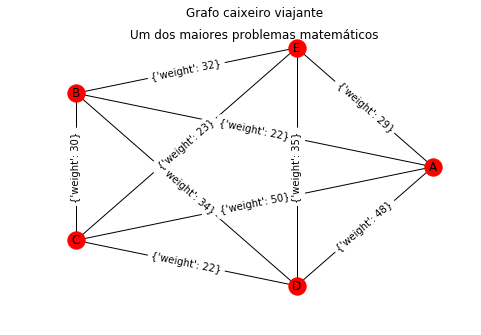

In [13]:
pos=nx.circular_layout(G)
nx.draw(G,pos, with_labels=True)
#nx.draw_circular(G,node_color='r',with_labels=True, edge_labels=labels)
nx.draw_networkx_edge_labels(G, pos)
plt.title("Grafo caixeiro viajante")
plt.suptitle("Um dos maiores problemas matemáticos")
plt.show()

In [76]:
def float2(value, qf):
    return float('%.'+str(qf)+'f' % (value))

def sumAllNeighborsAndTxyNxy(vertice):
    s = 0
    for vizinho in G.neighbors(vertice):
        Atx_y = float("%.3f" % (1/G.get_edge_data(vertice, vizinho)['weight']))
        Anx_y = 0.1
        Atxn = float("%.3f" % (Atx_y*Anx_y))
        s += Atxn
    return s

routs = []
distances = []
tx_y = []
nx_y = []
txn = []
pxy = []
ppxy = []
for vertice in G.nodes():
    sumTxVertice = sumAllNeighborsAndTxyNxy(vertice)
    for vizinho in G.neighbors(vertice):
        routs.append([vertice, vizinho])
        distances.append(G.get_edge_data(vertice, vizinho)['weight'])
        Atx_y = float("%.3f" % (1/G.get_edge_data(vertice, vizinho)['weight']))
        Anx_y = 0.1
        Atxn = float("%.3f" % (Atx_y*Anx_y))
        Apxy = float("%.3f" % (Atxn/sumTxVertice))
        tx_y.append(Atx_y)
        nx_y.append(Anx_y)
        txn.append(Atxn)
        pxy.append(Apxy)
        ppxy.append(Apxy*100)
        # print("({}-{})".format(vertice, vizinho))
print(routs)
print(distances)
print(tx_y)
print(nx_y)

[['A', 'E'], ['A', 'B'], ['A', 'C'], ['A', 'D'], ['E', 'A'], ['E', 'B'], ['E', 'C'], ['E', 'D'], ['B', 'A'], ['B', 'E'], ['B', 'C'], ['B', 'D'], ['C', 'A'], ['C', 'E'], ['C', 'B'], ['C', 'D'], ['D', 'A'], ['D', 'E'], ['D', 'B'], ['D', 'C']]
[29, 22, 50, 48, 29, 32, 23, 35, 22, 32, 30, 34, 50, 23, 30, 22, 48, 35, 34, 22]
[0.034, 0.045, 0.02, 0.021, 0.034, 0.031, 0.043, 0.029, 0.045, 0.031, 0.033, 0.029, 0.02, 0.043, 0.033, 0.045, 0.021, 0.029, 0.029, 0.045]
[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]


In [77]:
dados = {
    '1. Rotas':routs,
    '2. Distância':distances,
    '3. t(xy)':tx_y,
    '4. n(xy)':nx_y,
    '5. t(xy)*n(xy)':txn,
    '6. P(xy)':pxy,
    '7. P(xy) %':ppxy
}

df = pd.DataFrame(dados)
df

,1. Rotas,2. Distância,3. t(xy),4. n(xy),5. t(xy)*n(xy),6. P(xy),7. P(xy) %
0,"[A, E]",29,0.034,0.1,0.003,0.273,27.3
1,"[A, B]",22,0.045,0.1,0.004,0.364,36.4
2,"[A, C]",50,0.020,0.1,0.002,0.182,18.2
3,"[A, D]",48,0.021,0.1,0.002,0.182,18.2
4,"[E, A]",29,0.034,0.1,0.003,0.231,23.1
5,"[E, B]",32,0.031,0.1,0.003,0.231,23.1
6,"[E, C]",23,0.043,0.1,0.004,0.308,30.8
7,"[E, D]",35,0.029,0.1,0.003,0.231,23.1
8,"[B, A]",22,0.045,0.1,0.004,0.308,30.8
9,"[B, E]",32,0.031,0.1,0.003,0.231,23.1
